In [272]:
#Yuyang Gong's hw2
#fall2023 cs4962 ML and Optimization, RPI
import numpy as np

###### 1. Show that the soft-shrinkage operator on vectors is well defined:$$S_\alpha(x_0) = \text{arg}\min_{x\in\mathbb{R}^d}\frac{1}{2\alpha}\lVert x-x_0\rVert_2^2 + \lVert x\rVert_1$$ and that the solution is given by: $$S_\alpha(x_0) = s_\alpha((x_0)_i)$$ where $s_\alpha$ is the soft-shrinkage operator on scalars.


We can break down this minimization problem into two separate components:

1. Minimization of the quadratic term: $\frac{1}{2\alpha}\|x-x_0\|_2^2$.
2. Minimization of the L1-norm term: $\|x\|_1$.

Let's analyze each part separately:

1. Minimization of the Quadratic Term:
   The quadratic term is a strictly convex function, and its minimizer can be found by setting its gradient equal to zero. For $\frac{1}{2\alpha}\|x-x_0\|_2^2$, we have:

$$
\nabla \left(\frac{1}{2\alpha}\|x-x_0\|_2^2\right) = \frac{1}{\alpha}(x - x_0)
$$

Setting this gradient to zero yields:

$$
\frac{1}{\alpha}(x - x_0) = 0
$$

This implies that $x = x_0$ is the minimizer of the quadratic term.

2. Minimization of the L1-Norm Term:
   The L1-norm is not differentiable at zero, but it is convex. It can be minimized using subgradients. However, in this case, the subgradient is straightforward: for $g(x) = \|x\|_1$, the subgradient at any nonzero element $x_i$ is either $1$ or $-1$, depending on the sign of $x_i$, and at $x_i = 0$, it is any value between $-1$ and $1$.

Now, combining the two parts:
Applying the soft-shrinkage operator on the scalar $x_i$ using $s_\alpha(z)$, we get:
$$x_i = \begin{cases}
    x_i - \alpha & \text{if } x_i > \alpha \\
    x_i + \alpha & \text{if } x_i < -\alpha \\
    0 & \text{if } -\alpha \leq x_i \leq \alpha
    \end{cases} =
    s_\alpha((x_0)_i)$$


In [273]:
# implement the soft-shrinkage operator without for loop
def softShrink(x0, alpha):
    return np.sign(x0) * np.maximum(np.abs(x0) - alpha, 0)

###### 2. Proximal gradient descent solve problems of the form, Comp:$$\min_x f(x) + g(x)$$ where $f$ is differentiable and $g$ is convex. It has Prox:$$x_{t+1} = \text{arg}\min_x\frac{1}{2\alpha_t}\lVert x-x_{t}-\alpha_t\nabla f(x_t)\rVert_2^2 + g(x)$$ Note that (Prox) is always strictly convex, so $x_{t+1}$ is always a well-defined single point. Argue that if $x^*$ is a fixed point of (Prox), then $x^*$ is a minimizer of $f(x) + g(x)$.

Given that $x^*$ is a fixed point of the Prox update, we have:
$$ \frac{1}{2\alpha}\lVert x-x*-\alpha\nabla f(x)\rVert_2^2 + g(x) \geq \frac{1}{2\alpha}\lVert x^*-x*-\alpha\nabla f(x^*)\rVert_2^2 + g(x^*)$$
$$ \frac{1}{2\alpha}\lVert x-x*-\alpha\nabla f(x)\rVert_2^2 + g(x) \geq g(x^*)$$
Since the first term is always non-negative, we have:
$$ g(x) \geq g(x^*)$$
Use first order Taylor expansion of $f(x)$, we have:
\begin{align*}
    f(x) + g(x) &\geq f(x^*) + g(x) + \nabla f(x^*)^T(x-x^*)\\
                &\geq f(x^*) + g(x^*) + \nabla f(x^*)^T(x-x^*)\\
\end{align*}
Hence $x^*$ is a minimizer of $f(x) + g(x)$.

###### 3. Consider the LASSO problem:$$\text{arg}\min_{x\in\mathbb{R^d}}\frac{1}{2}\lVert Ax-b\rVert_2^2 + \lambda\lVert x\rVert_1$$Write the expression for $x_{t+1}$ in the  composite gradient descent method for solving (LASSO), using the soft-shrinkage operator. Assume that stepsizes $α_t$ are given.

Take partial derivative of the objective function with respect to $x$:
\begin{align*}
    \frac{\partial}{\partial x}\left(\frac{1}{2}\lVert Ax-b\rVert_2^2 + \lambda\lVert x\rVert_1\right) &= \left(\frac{1}{2}\frac{\partial}{\partial x}\lVert Ax-b\rVert_2^2 + \lambda\frac{\partial}{\partial x}\lVert x\rVert_1\right)\\
    &= A^T(Ax-b) + \lambda\text{sign}(x)\\
\end{align*}

Using the soft-shrinkage operator, we have:
$$x_{t+1} = s_{\lambda\alpha_t}(x_t - \alpha_tA^T(Ax_t-b))$$


In [274]:
# Implement the istaLASSO function
def istaLasso(A, b, lambda_reg, x0, alpha, T):
    objhist = np.zeros(T+1)
    x = x0
    for t in range(T):
        objhist[t] = 0.5 * np.linalg.norm(A @ x - b)**2 + lambda_reg * np.linalg.norm(x, 1)
        x = softShrink(x - alpha * A.T @ (A @ x - b), alpha * lambda_reg)
    objhist[T] = 0.5 * np.linalg.norm(A @ x - b)**2 + lambda_reg * np.linalg.norm(x, 1)
    return x, objhist

###### 4. Compute the subdifferential of the objective of (LASSO) at $x$.

The subdifferential of the objective of (LASSO) at $x$ is:
$$\frac{\partial}{\partial x}\left(\frac{1}{2}\lVert Ax-b\rVert_2^2 + \lambda\lVert x\rVert_1\right) = A^T(Ax-b) + \lambda\text{sign}(x)$$


In [275]:
# Implement the lassoSubgrad function returns a subgradient for the LASSO objective at x
def lassoSubgrad(A, b, lambda_reg, x):
    return A.T @ (A @ x - b) + lambda_reg * np.sign(x)

# Implement the subgradLasso function
def subgradLasso(A, b, lambda_reg, x0, alpha, T):
    objhist = np.zeros(T+1)
    x = x0
    for t in range(T):
        objhist[t] = 0.5 * np.linalg.norm(A @ x - b)**2 + lambda_reg * np.linalg.norm(x, 1)
        g = lassoSubgrad(A, b, lambda_reg, x)
        x = x - alpha * g
    objhist[T] = 0.5 * np.linalg.norm(A @ x - b)**2 + lambda_reg * np.linalg.norm(x, 1)
    return x, objhist

###### 5. Use the ISTA and subgradient solvers for the LASSO problem to solve the deblurring problem. We assume we observe a blurred and noisy version of an image, $b = Bx + e$, and given knowledge of $B$, we recover $x$. We will use the popular modeling assumption that natural images are approximately sparse in an appropriately chosen basis.

Assume there is a known orthonormal vasis $H$ in which $x$ is approximately sparse: $x = Hz$, and $\lVert z\rVert_1$ is small. We have $ b= BHz + e = Az + e$, where $A = BH$. The LASSO problem is:
$$z^*= \text{arg}\min_z\frac{1}{2}\lVert Bz-b\rVert_2^2 + \lambda\lVert z\rVert_1$$
the estimate $x_\text{LASSO} = Hz^*$. Let H be given by the Haar wavelet basis, and $\lambda = 2\times 10^{-4}$

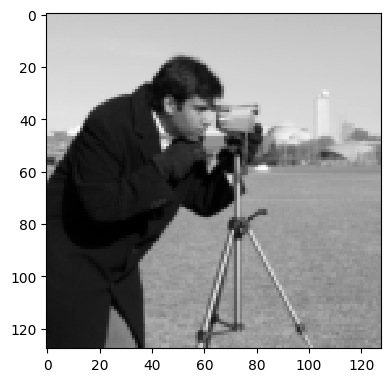

In [276]:
# Load the image we will be working with, 
# resize it so the problem is tractable, convert
# it to float format, and take a look at the image
from deblurringUtils import *
from skimage import data

n = 128
camera = data.camera()
smallcamera = resize(camera, [n, n])
camdata = img_as_float(smallcamera)
visualize(camdata)

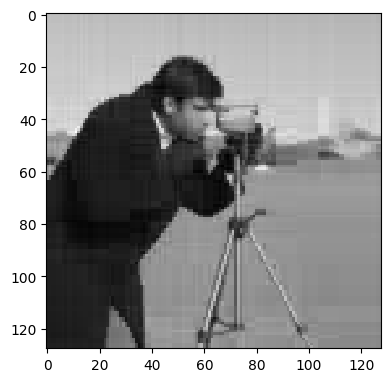

In [277]:
# Verify that the Haar basis does allow an almost sparse representation of the image
H = vectorized2DHaarMatrix(n, n) # the Haar matrix, an orthonormal basis
haarcoeffs = H.T @ vectorize(camdata) # convert to the Haar basis

p = 90 # what percentage of the coefficients to set to zero
thres = np.percentile(np.abs(haarcoeffs), p)
haarcoeffs[abs(haarcoeffs) <= thres] = 0 # set most entries to zero

# reconstruct the image from the sparse representation
reconstim = unvectorize(H @ haarcoeffs, n, n)
visualize(reconstim)

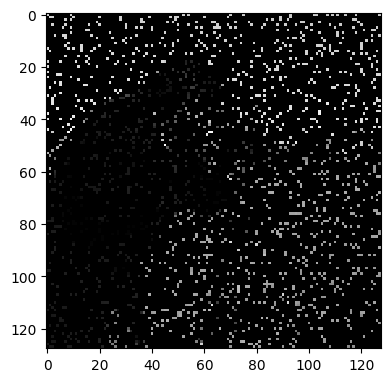

In [278]:
# Verify that a similarly sparse representation in the original pixel space is much worse.
import numpy.random as random

# mask the same percentage of pixels, randomly
mask = np.ones(n**2)
mask[:int(p/100*n**2)] = 0
mask = unvectorize(random.permutation(mask), n, n)
visualize(camdata * mask )

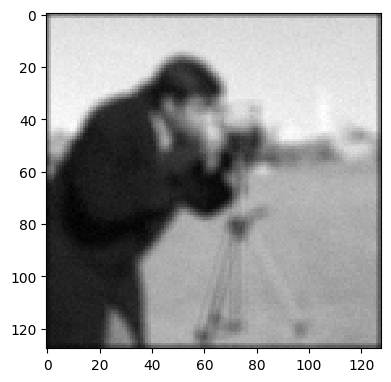

In [279]:
# Create the blurred, corrupted image. Corrupt using i.i.d. N (0, 1 × 10−4) Gausian noise.
B = vectorized2DBlurMatrix(n, n, 5);
std = 1e-2
corruption = std * random.randn(n**2)
b = B @ vectorize(smallcamera) + corruption
blurredcam = unvectorize(b, n, n)
visualize(blurredcam)

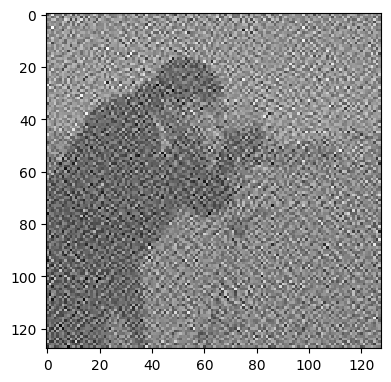

In [280]:
# Compute and visualize the naive solution x_LS.
from scipy.sparse.linalg import gmres
from scipy.sparse import csr_matrix

# solving with sparse matrices is faster
sB = csr_matrix(B)
linres, _ = gmres(sB, b, maxiter=50)
visualize(unvectorize(linres, n, n))


In [281]:
from scipy.sparse.linalg import svds

A = B @ H
_, topsv, _ = svds(A, k=1)
alphaSubgrad = 1/topsv**2
print("The step size for subgradient descent is", alphaSubgrad)

The step size for subgradient descent is [1.00235522]


The stepsize for the subgradient method is 1.00235522

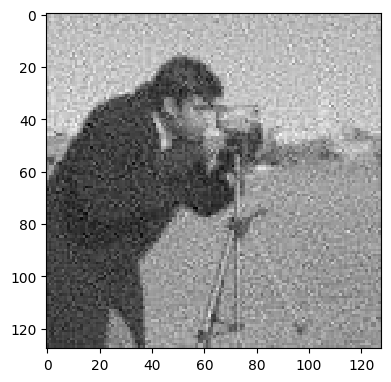

final objective value for subgradient descent is 0.6214134733592231


In [282]:
# Set λ=2 × 10−4 and run subgradient descent for 1000 iterations.
lambda_reg = 2e-4
steps = 1000
x0 = np.zeros(n**2)
subgradZ, objhistSubgrad = subgradLasso(A, b, lambda_reg, x0, alphaSubgrad, steps)
subgradB = unvectorize(H @ subgradZ, n, n)
visualize(subgradB)
print("final objective value for subgradient descent is", objhistSubgrad[-1])


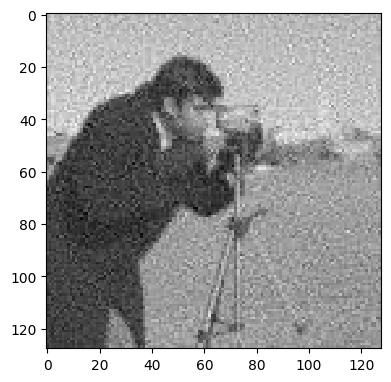

final objective value for ISTA: 0.6213288810869788


In [283]:
# same lambda, run ISTA for 1000 iterations
lambda_reg = 2e-4
x0 = np.zeros(n**2)
alphaISTA = alphaSubgrad
istaZ, objhistISTA = istaLasso(A, b, lambda_reg, x0, alphaISTA, steps)
istaB = unvectorize(H @ istaZ, n, n)
visualize(istaB)
print("final objective value for ISTA:", objhistISTA[-1])


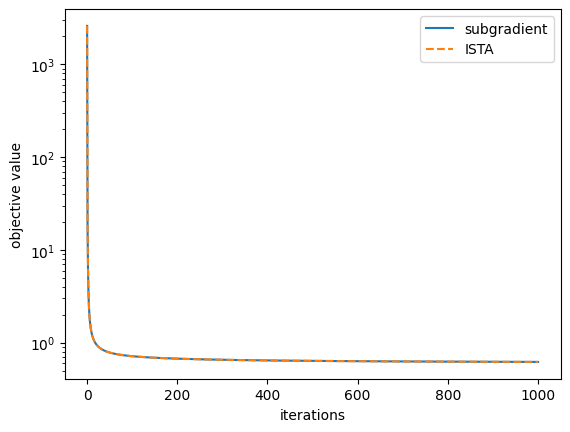

In [284]:
# plot the objective values for both algorithms on a log-scale
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.semilogy(objhistSubgrad, label='subgradient')
plt.semilogy(objhistISTA, label='ISTA', linestyle='--')
plt.legend()
plt.xlabel('iterations')
plt.ylabel('objective value')
plt.show()


###### What conclusions do you draw about the relative merits of the two approaches to solving the LASSO problem? What are the advantages and disadvantages of solving the LASSO problem vs the least squares problem?

It is supprising that in my output ISTA and subgradient descent have an almost exactly objective value. I would expect ISTA to have a lower objective value and a higher convergence rate. 
The subgradient method is less computationally expensive than the ISTA method, but it should not converge as fast as the ISTA method.

The advantage of solving the LASSO problem is that it can recover some of the unknown value, while the least squares problem can only compress the input to a function.
The disadvantage is that it is more computationally expensive than the least squares problem.

###### We plotted the LASSO objective to verify visually that the methods seem to be converging. Comment on the meaningfulness of that value in measuring the quality of the recovered solution. Can you think of a more meaningful metric to report the quality of the iterates?

The LASSO objective is not an obvious choice to measure the quality of the recovered solution, because it doesn't measure the difference between the recovered solution and the original image. However, since we are minimizing the LASSO objective, a lower value of the objective means a better solution.

A more meaningful metric I can think of is the mean squared error between the recovered solution and the original image.